# **Proyecto 1 - Coding Dojo**

##**Food sales prediction**

**Elaborado por:** Fabian Villarreal Sosa

## **Variables**

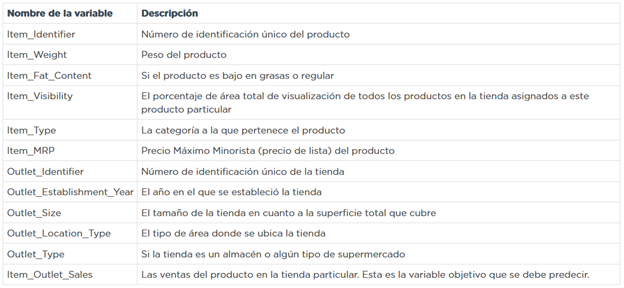

## **Parte 3**

Semana 3

Continuaremos trabajando en tu proyecto de predicción de ventas. El objetivo es ayudar a la tienda a comprender las propiedades de los productos y establecimientos que tienen un rol crucial en aumentar las ventas.

Para la Parte 3, tu tarea es construir varias visualizaciones de datos que te ayuden a entender mejor los datos y que ayuden a las partes interesadas a entender mejor las tendencias en los datos. Siéntete libre de dejarte llevar por tu creatividad esta semana, esta es tu oportunidad de establecer tu proyecto a parte de otros con análisis y visualizaciones excepcionales.

* Usa los datos que limpiaste la semana pasada. Si es necesario, puedes descargar los datos oiriginales. (Nota: Original data source) https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
* Crea varias visualizaciones de datos que te ayuden a entender mejor los datos con los que estás trabajando (análisis exploratorio de datos) y que ayude a otras personas entender las tendencias en los datos (análisis explicativo de datos).

## **Parte 4**

Semana 4

Continuaremos trabajando en tu proyecto de predicción de ventas. El objetivo es ayudar a la tienda a comprender las propiedades de los productos y establecimientos que tienen un rol crucial en aumentar las ventas.

Para la parte 4, tu tarea es completar cualquier análisis estadístico que te podría ayudar a entender, explicar o modelar tus datos. Esto podría incluir:

* Histogramas para ver la distribución de varias características en tu conjunto de datos.
* Diagramas de caja para ver los resúmenes estadísticos de varias características en tu conjunto de datos.
* Bonus: mapas de calor de las correlaciones entre características
* Cualquier cosa que quieras continuar refinando para el proyecto (siéntete libre de continuar con los trabajos de las semanas anteriores que no tuviste tiempo para completar).

## **Parte 5**

Semana 5

El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y puntos de venta que juegan un papel crucial en el aumento de las ventas.

Para la Parte 5, tu tarea es usar Regresión lineal o KNN (¡o ambos!) Para crear un modelo para predecir las ventas:

* A continuación, se muestran algunos recursos para utilizar cuando se trata de variables categóricas:
  * [Tratamiento de características categóricas en aprendizaje automático](https://www.kdnuggets.com/2019/07/categorical-features-machine-learning.html)
  * [Datos categóricos](https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63)
  * Aquí está todo lo que necesita saber sobre la codificación de datos categóricos (con código Python) 

* La columna "Item_Outlet_Sales" es tu objetivo. Construye un modelo para predecir esto.
* Evalúa tu modelo.
* ¿Hay algo que puedas hacer para mejorar el modelo?
* ¿Qué características están más asociadas con la predicción de ventas mayores?

## **Parte 6**

Final - Semana 6

Esta semana, finalizarás tu proyecto de predicción de ventas. El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y puntos de venta que juegan un papel crucial en el aumento de las ventas.

Para finalizar este proyecto, tu tarea es mejorar tu modelo para predecir las ventas y preparar una presentación corta (5-10 minutos) sobre tu proyecto.

* ¿Puedes utilizar otros métodos (por ejemplo, bosques aleatorios) para mejorar tu modelo para predecir las ventas?
* Finaliza tu README con una descripción general del proyecto, una explicación de los datos (incluidas las visualizaciones) y un resumen de los resultados y recomendaciones. Piensa en esto como un resumen ejecutivo o una descripción general de tu proyecto.
* Prepara una presentación corta (de 5 a 10 minutos). Grábate a ti mismo dando esta presentación. No dudes en utilizar cualquier software disponible (Zoom, OBS, etc.). Incluye esta grabación en tu repositorio de GitHub.
* Asegúrate de que tu repositorio de GitHub esté organizado y sea profesional. Recuerda, esto debe usarse para mostrar tus habilidades y habilidades en ciencia de datos. 

Registra todo tu trabajo en GitHub y entrega un enlace a tu repositorio de GitHub con tu proyecto final. Asegúrate de incluir las diapositivas de tu presentación y la grabación en tu repositorio de GitHub también.

## **Datos**

In [733]:
# !pip install gwpy matplotlib~=3.5.0;

In [734]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from google.colab import drive

In [735]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [736]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Proyecto 1')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Proyecto 1'

In [737]:
# Cargar los datos
df=pd.read_csv('sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [738]:
# Determinar directorio para guardar
os.chdir('/content/drive/MyDrive/Coding Dojo/Proyecto 1/Graficos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Proyecto 1/Graficos'

## **Cleaning and data mining**

In [739]:
# Data structure information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [740]:
df.shape

(8523, 12)

In [741]:
# Descriptive statistics
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [742]:
# It can be seen that the visibility for the records of some products is zero. 
# For these records, they will be assigned the average value of product visibility. 
# https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/

df['Item_Visibility'] = df['Item_Visibility'].replace({0: np.nan}) # Replace zeros with Nans

# Get the average value of the visibility of each product by its ID to replace the missing values
df['Item_Visibility']=df.groupby(['Item_Identifier'])['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))

df['Item_Visibility'].describe()

count    8523.000000
mean        0.070749
std         0.050313
min         0.003575
25%         0.031395
50%         0.058100
75%         0.098867
max         0.328391
Name: Item_Visibility, dtype: float64

In [743]:
# Columns with missing values
columnas_nan=df.columns[df.isna().any()] # Columns that have at least one missing value
columnas_nan

Index(['Item_Weight', 'Outlet_Size'], dtype='object')

In [744]:
# Number of missing values
print(df[columnas_nan].isna().sum())
print('\nPercentage\n')
print(round(df[columnas_nan].isna().sum()/df.shape[0]*100,2))

Item_Weight    1463
Outlet_Size    2410
dtype: int64

Percentage

Item_Weight    17.17
Outlet_Size    28.28
dtype: float64


In [745]:
# Get the average value of the weight of each product by its ID to replace the missing values
df['Item_Weight']=df.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [746]:
df['Item_Weight'].isna().sum() # Now the variable has less missing data
df[df['Item_Weight'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [747]:
# Remove rows where product weight has missing value 
df=df[df['Item_Weight'].notna()]

In [748]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [749]:
# Following the recommendation of https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/
# Impute the outlet size with the mode of the variable

# https://stackoverflow.com/questions/45741879/can-i-replace-nans-with-the-mode-of-a-column-in-a-grouped-data-frame
df['Outlet_Size']=df.groupby(['Outlet_Type'])['Outlet_Size'].apply(lambda x: x.fillna(x.mode()[0]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## **Data exploration**

In [750]:
# Plot histogram of numerical variables 
num_cols=df.select_dtypes([np.number]).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

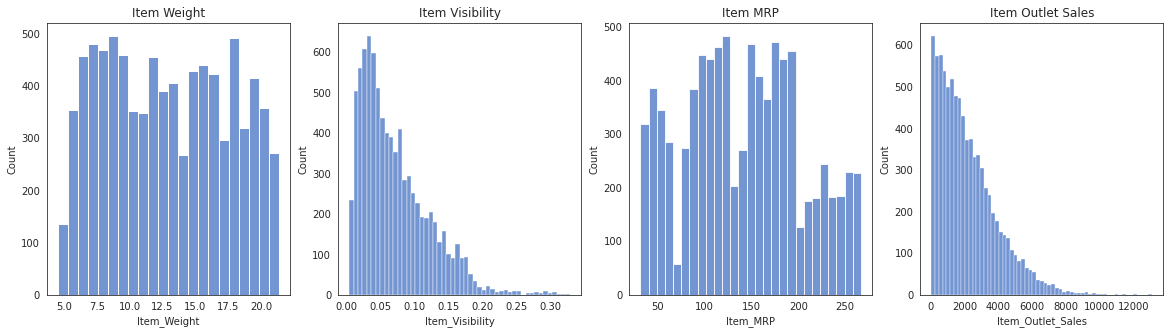

In [751]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=False, sharey=False)

sns.histplot(df['Item_Weight'], ax=axes[0])
axes[0].set_title('Item Weight')

sns.histplot(df['Item_Visibility'], ax=axes[1])
axes[1].set_title('Item Visibility')

sns.histplot(df['Item_MRP'], ax=axes[2])
axes[2].set_title('Item MRP')

sns.histplot(df['Item_Outlet_Sales'], ax=axes[3])
axes[3].set_title('Item Outlet Sales');

In [752]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [753]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [754]:
df['Quantity_Sold']=round(df['Item_Outlet_Sales']/df['Item_MRP'],0) # Estimation of the quantity sold of the product. It is assumed that the list price already includes taxes
df['Quantity_Sold']=df['Quantity_Sold'].astype('int')

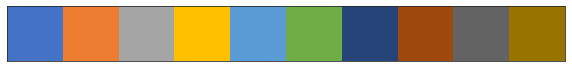

In [755]:
# Estilo de los graficos
sns.set_style('white')

# Paleta de colores Excel
my_palette=['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Colores de Microsoft Excel
sns.palplot(sns.color_palette(my_palette, 10))

# Definir paleta
sns.set_palette(my_palette)

In [756]:
# Change categories
df.loc[df['Item_Fat_Content']=='reg', 'Item_Fat_Content']='Regular'
df.loc[df['Item_Fat_Content']=='low fat', 'Item_Fat_Content']='Low Fat'
df.loc[df['Item_Fat_Content']=='LF', 'Item_Fat_Content']='Low Fat'

# Number of products sold by fat content
df1=df.groupby(['Item_Fat_Content'])[['Quantity_Sold']].sum()
df1=df1.reset_index()
df1.head()

,Item_Fat_Content,Quantity_Sold
0,Low Fat,84533
1,Regular,46838


In [757]:
# !pip install gwpy matplotlib~=3.5.0

[Text(0, 0, '0'),
 Text(0, 0, '10,000'),
 Text(0, 0, '20,000'),
 Text(0, 0, '30,000'),
 Text(0, 0, '40,000'),
 Text(0, 0, '50,000'),
 Text(0, 0, '60,000'),
 Text(0, 0, '70,000'),
 Text(0, 0, '80,000')]

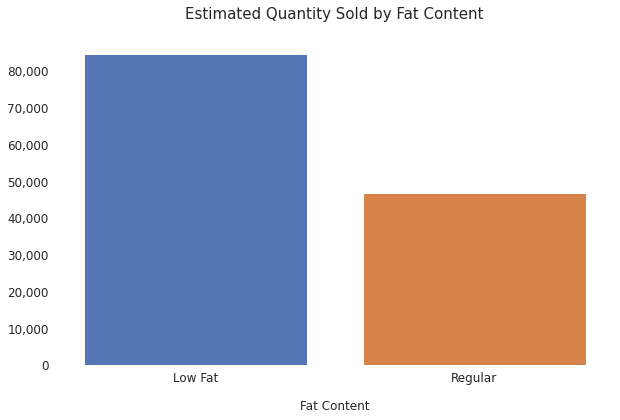

In [758]:
plt.figure(figsize=(10, 6))
p1=sns.barplot(data=df1, x='Item_Fat_Content', y='Quantity_Sold')
plt.title('Estimated Quantity Sold by Fat Content', fontsize=15, pad=20)
plt.ylabel('')
plt.yticks(np.arange(0, max(df1['Quantity_Sold'])+1, 10000), fontsize=12)
plt.xlabel('Fat Content', fontsize=12, labelpad=15) 
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
p1.set_yticklabels('{:,.0f}'.format(x) for x in p1.get_yticks())
# plt.bar_label(p1.containers[0], fontsize=12)

# More low-fat related products are sold, although there may also be more products in this category.

In [759]:
df.groupby(['Item_Fat_Content'])[['Item_Identifier']].nunique()

,Item_Identifier
Item_Fat_Content,
Low Fat,1007
Regular,548


In [760]:
# Number of products sold by outlet
df2=df.groupby(['Outlet_Identifier'])[['Quantity_Sold']].sum()
df2=df2.reset_index()
df2=df2.sort_values(by=['Quantity_Sold'], ascending=False)
df2

,Outlet_Identifier,Quantity_Sold
5,OUT027,24789
6,OUT035,15779
9,OUT049,15472
2,OUT017,15427
8,OUT046,15054
1,OUT013,14910
7,OUT045,14467
3,OUT018,12859
0,OUT010,1323
4,OUT019,1291


[Text(0, 0, '0'),
 Text(0, 0, '5,000'),
 Text(0, 0, '10,000'),
 Text(0, 0, '15,000'),
 Text(0, 0, '20,000')]

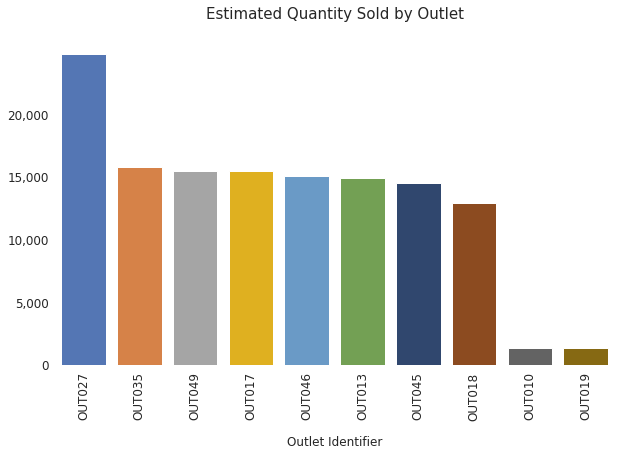

In [761]:
plt.figure(figsize=(10, 6))
p2=sns.barplot(data=df2, x='Outlet_Identifier', y='Quantity_Sold')
plt.title('Estimated Quantity Sold by Outlet', fontsize=15, pad=20)
plt.ylabel('')
plt.yticks(np.arange(0, max(df2['Quantity_Sold'])+1, 5000), fontsize=12)
plt.xlabel('Outlet Identifier', fontsize=12, labelpad=15) 
plt.xticks(fontsize=12, rotation=90)
sns.despine(left=True, bottom=True)
p2.set_yticklabels('{:,.0f}'.format(x) for x in p2.get_yticks())
# plt.bar_label(p2.containers[0], fontsize=12);

# The OUT027 outlet is the one that has sold the most products, while the OUT010 and OUT019 outlet are the ones that have sold the least.

In [762]:
# Average product visibility and quantity sold 
df3=df.groupby(['Item_Identifier', 'Item_Fat_Content']).agg({'Item_Visibility': 'mean',
                                         'Quantity_Sold': 'sum'})
df3=df3.reset_index()
df3.head(10)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Quantity_Sold
0,DRA12,Low Fat,0.047934,78
1,DRA24,Regular,0.048062,96
2,DRA59,Regular,0.153963,113
3,DRB01,Low Fat,0.082126,24
4,DRB13,Regular,0.008002,64
5,DRB24,Low Fat,0.020624,79
6,DRB25,Low Fat,0.077305,93
7,DRB48,Regular,0.027650,112
8,DRC01,Regular,0.019219,105
9,DRC12,Low Fat,0.037893,47


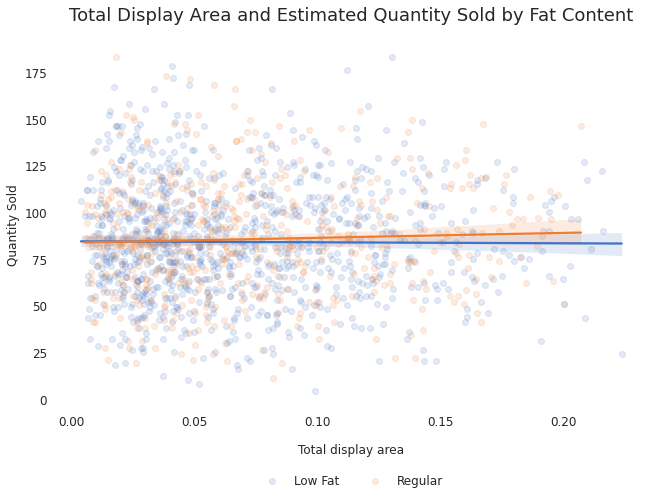

In [763]:
p3=sns.lmplot(data=df3, x="Item_Visibility", y="Quantity_Sold",
              scatter=True, scatter_kws={'alpha':0.15},
              hue='Item_Fat_Content',
              legend=False)
plt.title('Total Display Area and Estimated Quantity Sold by Fat Content', fontsize=18, pad=20)
plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2,
           frameon=False,
           fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Total display area', fontsize=12, labelpad=15)
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

# There appears to be no relationship between the total display area and the estimated quantity sold.

In [764]:
Item_Type=df['Item_Type'].unique().tolist()

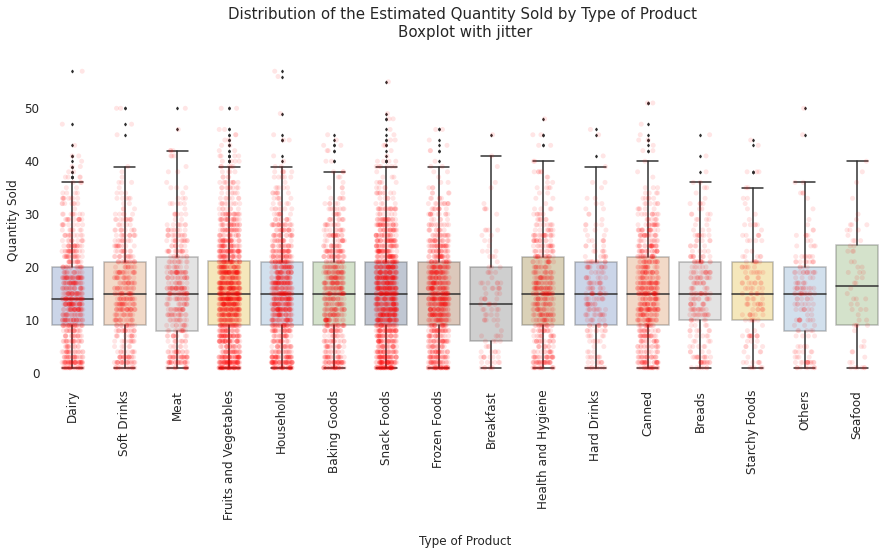

In [765]:
sns.boxplot(data=df, x='Item_Type', y='Quantity_Sold',
            order=Item_Type, 
            palette=my_palette,
            fliersize=2,
            boxprops=dict(alpha=.3))
sns.stripplot(data=df, x='Item_Type', y='Quantity_Sold', order=Item_Type, color='r', jitter=0.2, alpha=0.1)
plt.title('Distribution of the Estimated Quantity Sold by Type of Product \nBoxplot with jitter', fontsize=15, pad=20)
plt.ylabel('Quantity Sold', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Type of Product', fontsize=12, labelpad=15)
plt.xticks(fontsize=12, rotation=90)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(15, 6);

# Boxplot with jitter
# Fruits, vegetables, snacks foods and frozen foods have the highest purchase frequency, while seafood has the lowest purchase records.
# It can be seen that the median of the quantity sold throughout the different establishments and types of products is 15 units. 

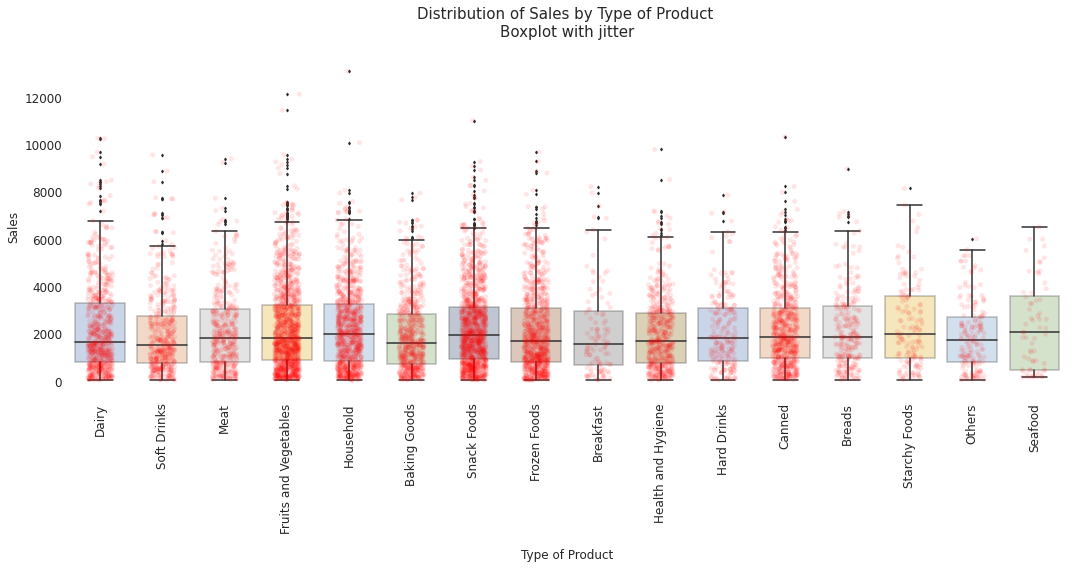

In [766]:
sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales',
            order=Item_Type,
            palette=my_palette,
            fliersize=2,
            boxprops=dict(alpha=.3))
sns.stripplot(data=df, x='Item_Type', y='Item_Outlet_Sales', order=Item_Type, color='r', jitter=0.2, alpha=0.1)
plt.title('Distribution of Sales by Type of Product \nBoxplot with jitter', fontsize=15, pad=20)
plt.ylabel('Sales', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Type of Product', fontsize=12, labelpad=15)
plt.xticks(fontsize=12, rotation=90)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(15, 8);

# Save graph
plt.tight_layout()
plt.savefig('graph_Boxplot_Sales_TypeProduct.png', dpi=300) 

In [767]:
df.groupby(['Item_Type'])[['Quantity_Sold']].median()

,Quantity_Sold
Item_Type,
Baking Goods,15.0
Breads,15.0
Breakfast,13.0
Canned,15.0
Dairy,14.0
Frozen Foods,15.0
Fruits and Vegetables,15.0
Hard Drinks,15.0
Health and Hygiene,15.0


In [768]:
# Histograms to see the distribution of various features in the data set
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


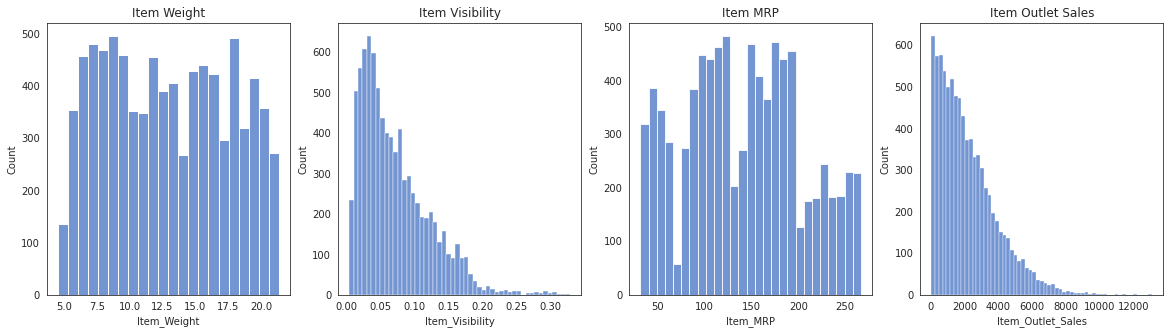

In [769]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=False, sharey=False)

sns.histplot(df['Item_Weight'], ax=axes[0])
axes[0].set_title('Item Weight')

sns.histplot(df['Item_Visibility'], ax=axes[1])
axes[1].set_title('Item Visibility')

sns.histplot(df['Item_MRP'], ax=axes[2])
axes[2].set_title('Item MRP')

sns.histplot(df['Item_Outlet_Sales'], ax=axes[3])
axes[3].set_title('Item Outlet Sales');

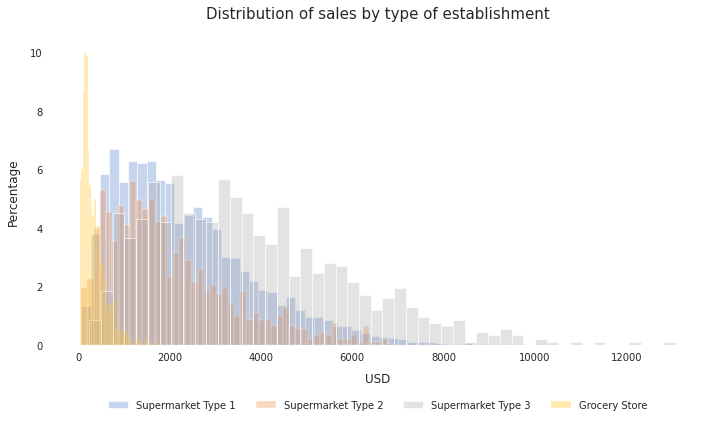

In [770]:
# Distribution of sales by type of establishment
sns.histplot(data=df[df['Outlet_Type']=='Supermarket Type1'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[0], alpha=0.3, label='Supermarket Type 1')
sns.histplot(data=df[df['Outlet_Type']=='Supermarket Type2'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[1], alpha=0.3, label='Supermarket Type 2')
sns.histplot(data=df[df['Outlet_Type']=='Supermarket Type3'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[2], alpha=0.3, label='Supermarket Type 3')
sns.histplot(data=df[df['Outlet_Type']=='Grocery Store'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[3], alpha=0.3, label='Grocery Store')

plt.title('Distribution of sales by type of establishment', fontsize=15, pad=20)
plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=4,
           frameon=False)
plt.ylabel('Percentage', fontsize=12, labelpad=10)
plt.xlabel('USD', fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

# Save graph
plt.tight_layout()
plt.savefig('graph_Hist_Sales_Establishment.png', dpi=300) 

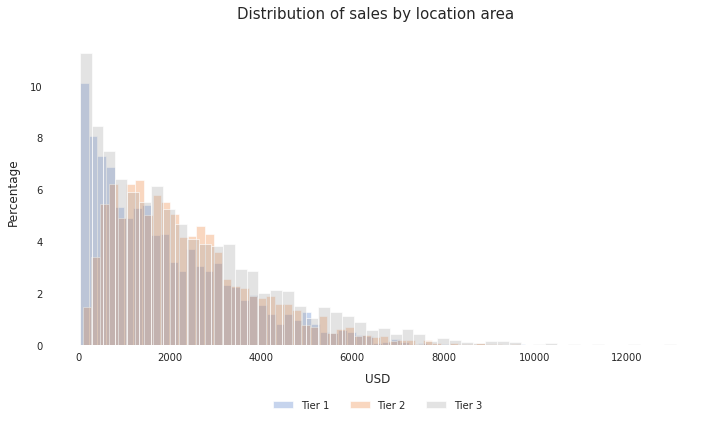

In [771]:
# Distribution of sales by location area 
sns.histplot(data=df[df['Outlet_Location_Type']=='Tier 1'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[0], alpha=0.3, label='Tier 1')
sns.histplot(data=df[df['Outlet_Location_Type']=='Tier 2'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[1], alpha=0.3, label='Tier 2')
sns.histplot(data=df[df['Outlet_Location_Type']=='Tier 3'], x='Item_Outlet_Sales', stat='percent', bins=50, color=my_palette[2], alpha=0.3, label='Tier 3')

plt.title('Distribution of sales by location area ', fontsize=15, pad=20)
plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False)
plt.ylabel('Percentage', fontsize=12, labelpad=10)
plt.xlabel('USD', fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

# Save graph
plt.tight_layout()
plt.savefig('graph_Hist_Sales_Location.png', dpi=300) 

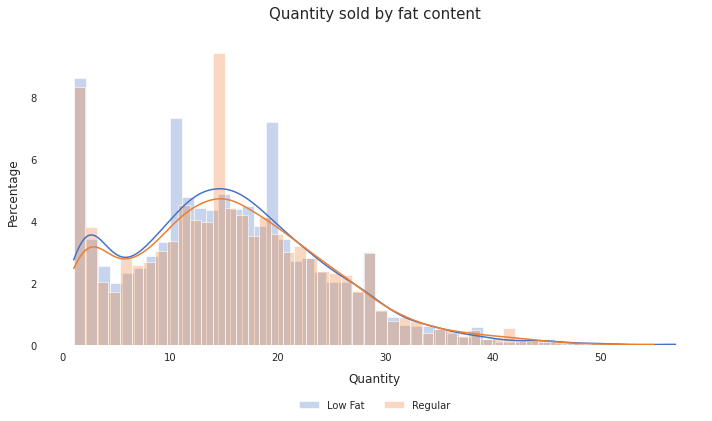

In [772]:
# Quantity sold by fat content
sns.histplot(data=df[df['Item_Fat_Content']=='Low Fat'], x='Quantity_Sold', stat='percent', kde=True, bins=50, color=my_palette[0], alpha=0.3, label='Low Fat')
sns.histplot(data=df[df['Item_Fat_Content']=='Regular'], x='Quantity_Sold', stat='percent', kde=True, bins=50, color=my_palette[1], alpha=0.3, label='Regular')

plt.title('Quantity sold by fat content', fontsize=15, pad=20)
plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False)
plt.ylabel('Percentage', fontsize=12, labelpad=10)
plt.xlabel('Quantity', fontsize=12, labelpad=10)
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

# Save graph
plt.tight_layout()
plt.savefig('graph_Hist_Sales_FatContent.png', dpi=300) 

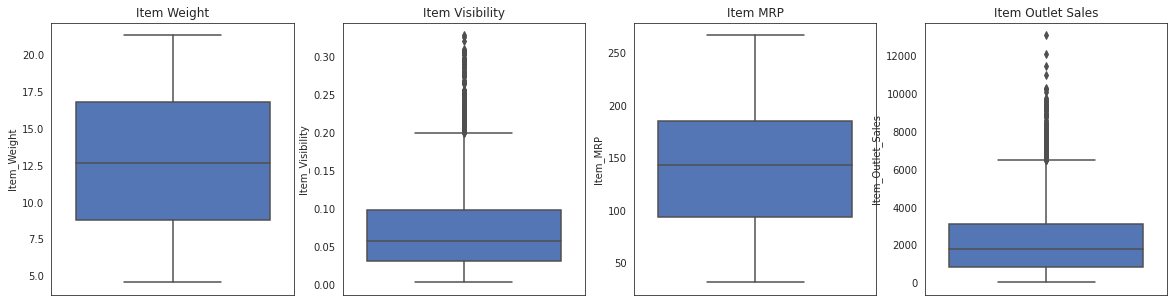

In [773]:
## Box plots to view statistical summaries of various features in the dataset
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=False, sharey=False)

sns.boxplot(data=df, y='Item_Weight', orient='v', ax=axes[0])
axes[0].set_title('Item Weight')

sns.boxplot(data=df, y='Item_Visibility', orient='v', ax=axes[1])
axes[1].set_title('Item Visibility')

sns.boxplot(data=df, y='Item_MRP', orient='v', ax=axes[2])
axes[2].set_title('Item MRP')

sns.boxplot(data=df, y='Item_Outlet_Sales', orient='v', ax=axes[3])
axes[3].set_title('Item Outlet Sales');

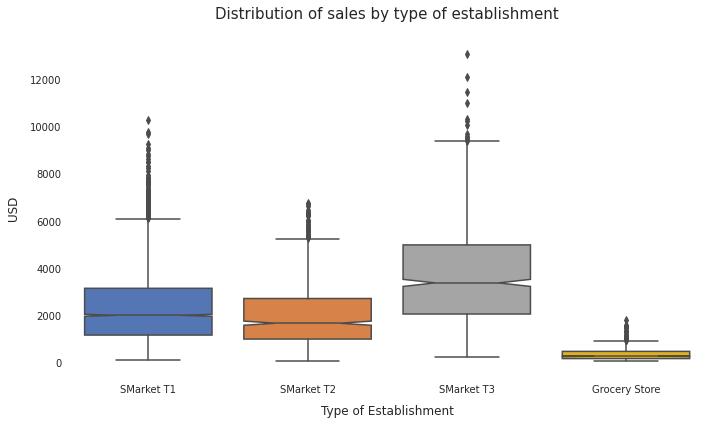

In [774]:
# Distribution of sales by type of establishment
sns.boxplot(data=df,
            x='Outlet_Type', y='Item_Outlet_Sales',
            order=['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'],
            notch=True)
plt.title('Distribution of sales by type of establishment', fontsize=15, pad=20)
plt.ylabel('USD', fontsize=12, labelpad=10)
plt.xlabel('Type of Establishment', fontsize=12, labelpad=10)
plt.xticks([0, 1, 2, 3], ['SMarket T1', 'SMarket T2', 'SMarket T3', 'Grocery Store'])
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

# Save graph
plt.tight_layout()
plt.savefig('graph_Boxplot_Sales_Establishment.png', dpi=300) 

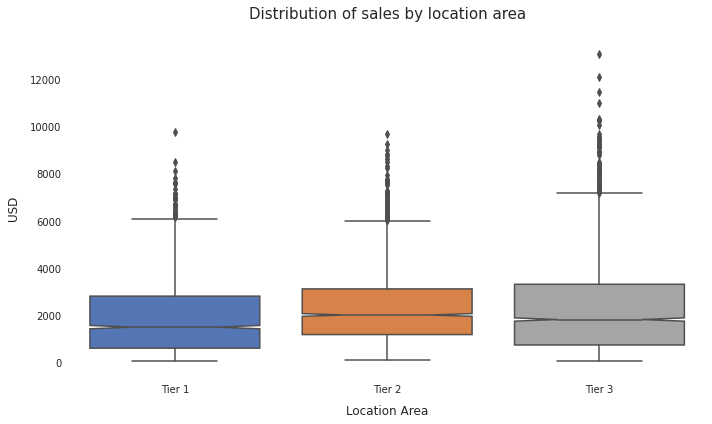

In [775]:
# Distribution of sales by location area
sns.boxplot(data=df,
            x='Outlet_Location_Type', y='Item_Outlet_Sales',
            order=['Tier 1', 'Tier 2', 'Tier 3'],
            notch=True)
plt.title('Distribution of sales by location area', fontsize=15, pad=20)
plt.ylabel('USD', fontsize=12, labelpad=10)
plt.xlabel('Location Area', fontsize=12, labelpad=10)
plt.xticks([0, 1, 2], ['Tier 1', 'Tier 2', 'Tier 3'])
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6);

# Save graph
plt.tight_layout()
plt.savefig('graph_Boxplot_Sales_Location.png', dpi=300) 

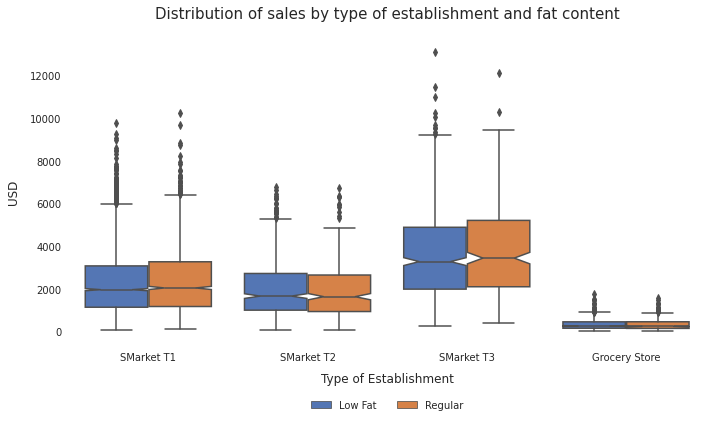

In [776]:
# Distribution of sales by type of establishment and fat content
sns.boxplot(data=df,
            x='Outlet_Type', y='Item_Outlet_Sales',
            order=['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'],
            notch=True,
            hue='Item_Fat_Content')
plt.title('Distribution of sales by type of establishment and fat content', fontsize=15, pad=20)
plt.ylabel('USD', fontsize=12, labelpad=10)
plt.xlabel('Type of Establishment', fontsize=12, labelpad=10)
plt.xticks([0, 1, 2, 3], ['SMarket T1', 'SMarket T2', 'SMarket T3', 'Grocery Store'])
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6)

plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False);

# Save graph
plt.tight_layout()
plt.savefig('graph_Boxplot_Sales_Establishment_FatContent.png', dpi=300)           

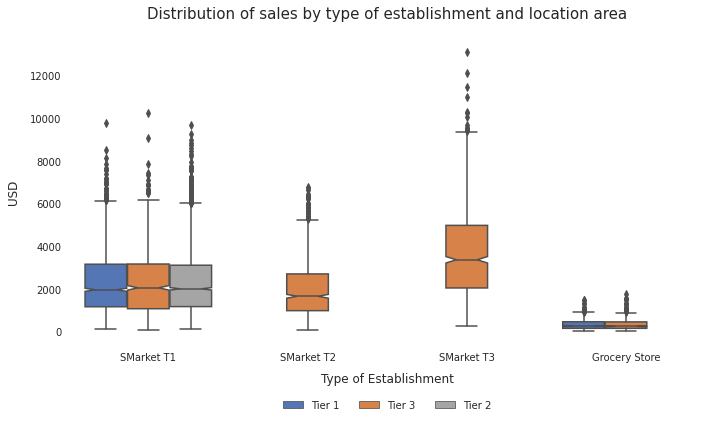

In [777]:
# Distribution of sales by type of establishment and location area
sns.boxplot(data=df,
            x='Outlet_Type', y='Item_Outlet_Sales',
            order=['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store'],
            notch=True,
            hue='Outlet_Location_Type')
plt.title('Distribution of sales by type of establishment and location area', fontsize=15, pad=20)
plt.ylabel('USD', fontsize=12, labelpad=10)
plt.xlabel('Type of Establishment', fontsize=12, labelpad=10)
plt.xticks([0, 1, 2, 3], ['SMarket T1', 'SMarket T2', 'SMarket T3', 'Grocery Store'])
sns.despine(left=True, bottom=True)
plt.gcf().set_size_inches(10, 6)

plt.legend(title=None,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False);

# Save graph
plt.tight_layout()
plt.savefig('graph_Boxplot_Sales_Establishment_Location.png', dpi=300)

In [778]:
# Bonus: heatmaps of feature correlations
num_cols=df.loc[:, df.columns != 'Outlet_Establishment_Year'].select_dtypes([np.number]).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Quantity_Sold'],
      dtype='object')

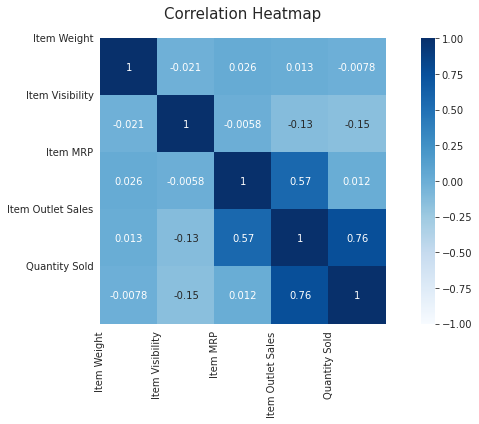

In [779]:
# Heatmap: Correlation Matrix
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
# https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

fig, ax=plt.subplots(nrows=1, ncols=1)

sns.heatmap(df[num_cols].corr(), 
            vmin=-1, vmax=1, 
            annot=True, 
            cmap='Blues',
            square=True)
ticks=['Item Weight', 'Item Visibility', 'Item MRP', 'Item Outlet Sales', 'Quantity Sold'] # Labels
plt.yticks(np.arange(len(ticks)), labels=ticks)
plt.xticks(np.arange(len(ticks)), labels=ticks)
plt.title('Correlation Heatmap', fontsize=15, pad=20)
plt.gcf().set_size_inches(10, 6);

# Save graph
plt.tight_layout()
plt.savefig('graph_Correlation_HeatMap.png', dpi=300)

## **Sales prediction**

In [780]:
# Libraries
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.model_selection import cross_validate

from sklearn.model_selection import GridSearchCV

In [781]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [782]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
 12  Quantity_Sold              8519 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage:

In [783]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity_Sold
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,4
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18


In [784]:
# There are features in the data that represent categories, but they are not represented numerically. 
# In this way, we proceed to give a label encoder (numerical representation) and convert them into dummies variables. 

In [785]:
# Library to address treatment of categorical variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [786]:
# Functions
le=LabelEncoder()
enc=OneHotEncoder()

In [787]:
# Categorical variables
var_cat=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'] 

# Due to the number of dummy variables involved in using the 'Item_Identifier' variable, it is not considered 
# in the model. Additionally, its weight and visibility are already captured, together with 
# its classification by type of product.

In [788]:
df['Item_Identifier'].nunique()

1555

In [789]:
# Label encode
for var in var_cat:
  df[var]=le.fit_transform(df[var])

# One Hot Encoding 
df=pd.get_dummies(df, columns=var_cat)

In [790]:
# Matrix of explanatory variables and target vector
X_var=df.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Quantity_Sold'], axis=1).columns
X=df.loc[:, X_var]

y=df['Item_Outlet_Sales'].values

print('X dimensions: ', X.shape)
print('y dimensions: ', y.shape)

X dimensions:  (8519, 50)
y dimensions:  (8519,)


In [791]:
# Training and test bases 
np.random.seed(2731) # Seed
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)

#### **Machine Learning**

In [792]:
# Function to obtain results of the models to be tested
# The following link is used as a reference for certain indicators not yet covered in the course
# https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/

def regress(model, X_train, X_test, y_train, y_test, method):
  np.random.seed(2731) # seed

  # Estimation
  model.fit(X_train, y_train)
  
  # Prediction
  df_train_yhat=model.predict(X_train)
  df_test_yhat=model.predict(X_test)

  # Metrics
  DeterCoef_train=model.score(X_train, y_train)
  DeterCoef_test=model.score(X_test, y_test)

  RMSE_train=np.sqrt(metrics.mean_squared_error(y_train, df_train_yhat))
  RMSE_test=np.sqrt(metrics.mean_squared_error(y_test, df_test_yhat))

  # Perform cross-validation
  # cv_score=cross_validate(model, X_train, y_train, cv=20, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
  # cv_score_r2_mean=np.mean(cv_score['train_r2'])
  # cv_score_r2_std=np.std(cv_score['train_r2'])
  # cv_score_r2_min=np.min(cv_score['train_r2'])
  # cv_score_r2_max=np.max(cv_score['train_r2'])

  # Results
  print(f'\nModel Report\n{method}\n')
  
  print(f'Determination Coefficient (Train): {DeterCoef_train:.3f}')
  print(f'Determination Coefficient (Test): {DeterCoef_test:.3f}')

  print(f'RMSE (Train): {RMSE_train:.3f}')
  print(f'RMSE (Test): {RMSE_test:.3f}') 
  
  # print(f'CV Score (R2): Mean - {cv_score_r2_mean:.3f} | Std - {cv_score_r2_std:.3f} | Min - {cv_score_r2_min:.3f} | Max - {cv_score_r2_max:.3f} ')

##### **Linear regression**

In [793]:
# Estimation
ols_regress=LinearRegression(fit_intercept=True) # Linear regression with constant

regress(ols_regress, X_train, X_test, y_train, y_test, 'Linear Regression')


Model Report
Linear Regression

Determination Coefficient (Train): 0.565
Determination Coefficient (Test): 0.559
RMSE (Train): 1134.519
RMSE (Test): 1112.233


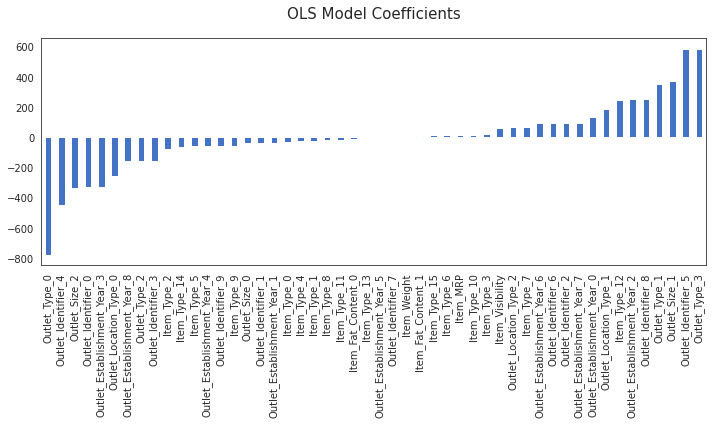

In [794]:
# Importance of coefficients
# https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/
coef_ols = pd.Series(ols_regress.coef_, X_train.columns).sort_values()

coef_ols.plot(kind = 'bar',
              color = my_palette[0],
              figsize = (10, 6))
plt.title('OLS Model Coefficients', fontsize = 15, pad = 20);

# Save graph
plt.tight_layout()
plt.savefig('graph_OLSCoefficients.png', dpi=300)

In [795]:
coef_ols

Outlet_Type_0                 -780.273091
Outlet_Identifier_4           -450.853688
Outlet_Size_2                 -337.498005
Outlet_Identifier_0           -329.419403
Outlet_Establishment_Year_3   -329.419403
Outlet_Location_Type_0        -255.402906
Outlet_Establishment_Year_8   -155.146105
Outlet_Type_2                 -155.146105
Outlet_Identifier_3           -155.146105
Item_Type_2                    -79.850910
Item_Type_14                   -67.179179
Item_Type_5                    -59.173008
Outlet_Establishment_Year_4    -58.507192
Outlet_Identifier_9            -58.507192
Item_Type_9                    -56.692059
Outlet_Size_0                  -35.001319
Outlet_Identifier_1            -35.001319
Outlet_Establishment_Year_1    -35.001319
Item_Type_0                    -28.612816
Item_Type_4                    -26.360488
Item_Type_1                    -21.864510
Item_Type_8                    -18.165707
Item_Type_11                   -15.330131
Item_Fat_Content_0              -9

In [796]:
# It can be seen that the type of outlet is one of the regressors with the greatest impact on 
# sales in terms of its magnitude, as a positive effect is seen for 'Supermarket Type3', but negative 
# for the case of 'Grocery Store'. On the other hand, sales seem to also respond to the establishment. 
# That is, there are establishments that present a higher level of sales on average in relation to others. 
# Such is the case of outlet 027 or outlet 046. In general terms, the results suggest that the level 
# of sales responds more to the characteristics regarding the type, size and establishment of outlets. 

With alternative function

In [797]:
# Add constant
X1_train=X_train
X1_train=sm.add_constant(X1_train);

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [798]:
# Fitting the model
lm=sm.OLS(y_train, X1_train).fit()

In [799]:
# Regression Table
# OLS Regression Results
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     275.1
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:19:39   Log-Likelihood:                -50405.
No. Observations:                5963   AIC:                         1.009e+05
Df Residuals:                    5934   BIC:                         1.011e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

##### **KNN**

In [800]:
X_KNN_train=X_train
X_KNN_test=X_test

# Standardize data 
scaler=StandardScaler()
# Standardize
scaler.fit(X_KNN_train)
scaler.fit(X_KNN_test)
# Transform
X_KNN_train=scaler.transform(X_KNN_train)
X_KNN_test=scaler.transform(X_KNN_test)

In [801]:
# Estimation
knn_regress=KNeighborsRegressor()

regress(knn_regress, X_KNN_train, X_KNN_test, y_train, y_test, 'KNN Regress')


Model Report
KNN Regress

Determination Coefficient (Train): 0.642
Determination Coefficient (Test): 0.455
RMSE (Train): 1028.994
RMSE (Test): 1236.368


Is there anything you can do to improve the model?

In [802]:
# In the case of linear regression, the model can be estimated with another set of regressors. 
# For example, you can group the product type categories into a smaller number of groups, obtain 
# an average of the visibility of each product, among others.

# In the case of the KNN regression, you can choose to change the optimal number of neighbors (k) 
# together with the weight given to each observation within the neighborhood. In this sense, the 
# 'GridSearchCV' function of scikit-learn is used to determine the number of optimal neighbors and 
# the optimal weight between the uniform and the one that weights according to the inverse of the distance.

In [803]:
np.random.seed(2731) # seed

# Model
knn_reg=KNeighborsRegressor()

# Parameters to evaluate in the 'GridSearchCV' function
parameters={'n_neighbors': range(2, 40, 1), # Test number of neighbors from 2 to 40
            'weights': ['uniform', 'distance']} # Weights to consider

# Definition and execution
gridsearch_knn=GridSearchCV(knn_reg, parameters, cv=10)
gridsearch_knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 40),
                         'weights': ['uniform', 'distance']})

In [804]:
# Result
print(gridsearch_knn.best_params_)

k_opt=gridsearch_knn.best_params_['n_neighbors']
w_opt=gridsearch_knn.best_params_['weights']

{'n_neighbors': 6, 'weights': 'distance'}


In [805]:
# Estimation
knn_regress_opt=KNeighborsRegressor(n_neighbors=k_opt, weights=w_opt)

regress(knn_regress_opt, X_KNN_train, X_KNN_test, y_train, y_test, 'KNN Regress')


Model Report
KNN Regress

Determination Coefficient (Train): 1.000
Determination Coefficient (Test): 0.467
RMSE (Train): 0.000
RMSE (Test): 1222.428


#### **Decision Tree**

In [806]:
# Library
from sklearn.tree import DecisionTreeRegressor

In [807]:
# List to store the average precisions for each depth level 'max_depth'
max_depth_range=list(range(1,40))

scores = []
for depth in max_depth_range:
  dtree_reg = DecisionTreeRegressor(max_depth=depth, random_state = 2731)
  dtree_reg.fit(X_train, y_train)
  score = dtree_reg.score(X_test, y_test)
  scores.append(score)

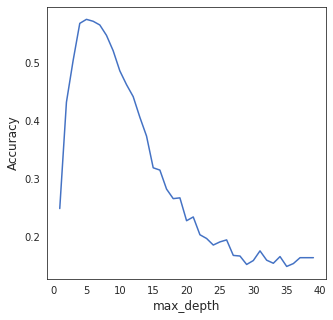

In [808]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(max_depth_range, scores)
axes.set_xlabel('max_depth', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [809]:
max_value=max(scores)
max_index=scores.index(max_value)

print(scores)
print(max_value)
print(max_index)
# The optimal depth level is 5

[0.248645202484843, 0.4315743293189679, 0.5031692423678542, 0.5673149447747765, 0.574196321364733, 0.5709193227405225, 0.564523944417338, 0.5466625482364652, 0.5202297004742699, 0.48557599973698096, 0.461907940852164, 0.4412740426404619, 0.40574400959284507, 0.37337641908032615, 0.3187818664677631, 0.31482533807436663, 0.2821391073016666, 0.2657041406996492, 0.2670540647919246, 0.22771802917528683, 0.23417192104433293, 0.2035717452186988, 0.19713293025042355, 0.18585735477193965, 0.1912684576825917, 0.1947261596597003, 0.16801386352359082, 0.1669633220693547, 0.15243351795784077, 0.15917422809180204, 0.17582120369875465, 0.15977788841250984, 0.15451506839100526, 0.16601064362992757, 0.14902469061914214, 0.1539787896385737, 0.16409680409162952, 0.16409680409162952, 0.16409680409162952]
0.574196321364733
4


In [810]:
# Estimation 
dtree_reg = DecisionTreeRegressor(max_depth=5, random_state = 2731)

regress(dtree_reg, X_train, X_test, y_train, y_test, 'Decision Tree Regression')


Model Report
Decision Tree Regression

Determination Coefficient (Train): 0.611
Determination Coefficient (Test): 0.574
RMSE (Train): 1072.175
RMSE (Test): 1092.709


#### **Bagged Trees**

In [811]:
# Library
from sklearn.ensemble import BaggingRegressor

In [812]:
# List of values to test the parameter n_estimators
estimator_range = [1] + list(range(10, 210, 10))
np.array(estimator_range)

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200])

In [813]:
# List to store the average precisions for each value of n_estimators
scores = []
for estimator in estimator_range:
  bag_regress = BaggingRegressor(n_estimators = estimator, bootstrap = True, random_state = 2731)
  bag_regress.fit(X_train, y_train)
  score = bag_regress.score(X_test, y_test)
  scores.append(score)

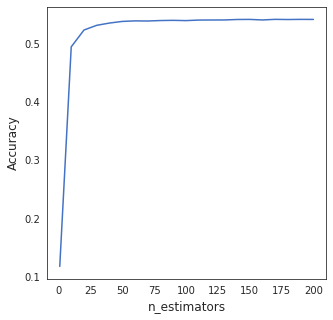

In [814]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [815]:
max_value=max(scores)
max_index=scores.index(max_value)

print(scores)
print(max_value)
print(max_index)
# The optimal n_estimators is at index 17: 170

[0.11788050511412462, 0.4939935973502225, 0.5228254260707081, 0.5308822639747738, 0.534766731149287, 0.5375480909040466, 0.5384885904646648, 0.5382750165448582, 0.5390706016215561, 0.5394159028500596, 0.5389572588810712, 0.5398897555865649, 0.5399945877146115, 0.5400518348338531, 0.5408514086478493, 0.541013367647553, 0.5400756215403519, 0.5411022393728251, 0.5408117638798173, 0.5410663590285583, 0.5409746809250167]
0.5411022393728251
17


In [816]:
# Estimation 
bag_regress = BaggingRegressor(n_estimators = 170,
                               bootstrap = True, 
                               random_state = 2731)

regress(bag_regress, X_train, X_test, y_train, y_test, 'Bagged Trees Regression')


Model Report
Bagged Trees Regression

Determination Coefficient (Train): 0.941
Determination Coefficient (Test): 0.541
RMSE (Train): 416.129
RMSE (Test): 1134.378


##### **Random Forest**

In [817]:
# Library
from sklearn.ensemble import RandomForestRegressor

In [818]:
# List of values to test the parameter n_estimators
estimator_range = [1] + list(range(10, 210, 10))
np.array(estimator_range)

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200])

In [819]:
# List to store the average precisions for each value of n_estimators
scores = []
for estimator in estimator_range:
  rfor_regress = RandomForestRegressor(n_estimators = estimator, bootstrap = True, random_state = 2731)
  rfor_regress.fit(X_train, y_train)
  score = rfor_regress.score(X_test, y_test)
  scores.append(score)

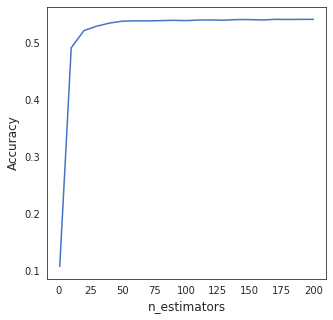

In [820]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [821]:
max_value=max(scores)
max_index=scores.index(max_value)

print(scores)
print(max_value)
print(max_index)
# The optimal n_estimators is at index 20: 200

[0.1068100221803413, 0.49109357309137736, 0.5212840548640172, 0.5290245956609557, 0.5344507652251715, 0.5378169130146283, 0.5384007303217391, 0.5383455438222899, 0.5387529765029124, 0.5393010346722658, 0.5387884596746045, 0.5397817413273465, 0.5399872944743926, 0.5395537672327523, 0.5406340347531113, 0.5406120999925006, 0.5399415148788914, 0.5410041877408596, 0.540866165889878, 0.5409697316082556, 0.5410194238888684]
0.5410194238888684
20


In [822]:
# Estimation 
rfor_regress = RandomForestRegressor(n_estimators = 200, 
                                     bootstrap = True,
                                     random_state = 2731)

regress(rfor_regress, X_train, X_test, y_train, y_test, 'Random Forest Regression')


Model Report
Random Forest Regression

Determination Coefficient (Train): 0.941
Determination Coefficient (Test): 0.541
RMSE (Train): 415.979
RMSE (Test): 1134.480


#### **Overview of the models**

In [823]:
regress(ols_regress, X_train, X_test, y_train, y_test, 'Linear Regression')


Model Report
Linear Regression

Determination Coefficient (Train): 0.565
Determination Coefficient (Test): 0.559
RMSE (Train): 1134.519
RMSE (Test): 1112.233


In [824]:
regress(knn_regress_opt, X_KNN_train, X_KNN_test, y_train, y_test, 'KNN Regress')


Model Report
KNN Regress

Determination Coefficient (Train): 1.000
Determination Coefficient (Test): 0.467
RMSE (Train): 0.000
RMSE (Test): 1222.428


In [825]:
regress(dtree_reg, X_train, X_test, y_train, y_test, 'Decision Tree Regression')


Model Report
Decision Tree Regression

Determination Coefficient (Train): 0.611
Determination Coefficient (Test): 0.574
RMSE (Train): 1072.175
RMSE (Test): 1092.709


In [826]:
regress(bag_regress, X_train, X_test, y_train, y_test, 'Bagged Trees Regression')


Model Report
Bagged Trees Regression

Determination Coefficient (Train): 0.941
Determination Coefficient (Test): 0.541
RMSE (Train): 416.129
RMSE (Test): 1134.378


In [827]:
regress(rfor_regress, X_train, X_test, y_train, y_test, 'Random Forest Regression')


Model Report
Random Forest Regression

Determination Coefficient (Train): 0.941
Determination Coefficient (Test): 0.541
RMSE (Train): 415.979
RMSE (Test): 1134.480


#### **Conclusions and recommendations**

In [828]:
# The results of the coefficient of determination and the RMSE in both the training 
# and test samples suggest that the Random Forest model should be used.
regress(rfor_regress, X_train, X_test, y_train, y_test, 'Random Forest Regression')


Model Report
Random Forest Regression

Determination Coefficient (Train): 0.941
Determination Coefficient (Test): 0.541
RMSE (Train): 415.979
RMSE (Test): 1134.480


In [829]:
# Importance of Features
list(zip(X_var, rfor_regress.feature_importances_))

[('Item_Weight', 0.07266754713555808),
 ('Item_Visibility', 0.09081924382190792),
 ('Item_MRP', 0.42495231219655283),
 ('Item_Fat_Content_0', 0.004523080962911284),
 ('Item_Fat_Content_1', 0.004405263517181138),
 ('Item_Type_0', 0.003870225966261064),
 ('Item_Type_1', 0.002755493380611899),
 ('Item_Type_2', 0.0019395964084006547),
 ('Item_Type_3', 0.004292911529640726),
 ('Item_Type_4', 0.006079952253582989),
 ('Item_Type_5', 0.004942718704322763),
 ('Item_Type_6', 0.007737822513496973),
 ('Item_Type_7', 0.002313097796136093),
 ('Item_Type_8', 0.003982827674314654),
 ('Item_Type_9', 0.0060654212504828355),
 ('Item_Type_10', 0.0032326781878121817),
 ('Item_Type_11', 0.0014168856408084656),
 ('Item_Type_12', 0.0016803268511378022),
 ('Item_Type_13', 0.006442405277731916),
 ('Item_Type_14', 0.004344304829113252),
 ('Item_Type_15', 0.0019101228898043335),
 ('Outlet_Identifier_0', 1.0414831770008938e-05),
 ('Outlet_Identifier_1', 0.001725584204784596),
 ('Outlet_Identifier_2', 0.00365013791

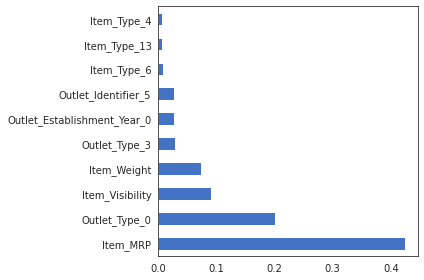

In [830]:
feat_importances = pd.Series(rfor_regress.feature_importances_, index = X_var)

# Grafico
feat_importances.nlargest(10).plot(kind = 'barh');

# Save graph
plt.tight_layout()
plt.savefig('graph_Features_Importances.png', dpi=300)